In [1]:
%ls ../data

buyer_db.csv     pgk-raw.csv      pkg-details.csv
mvp.csv          pgk-raw_cb.csv


In [76]:
#chequear query para base de clientes: SELECT * FROM "db_tracking_raw"."packages" limit 10;

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None) 

In [78]:
mvp = pd.read_csv("../data/mvp.csv")
det = pd.read_csv("../data/pkg-details.csv")

In [79]:
mvp = mvp.rename(columns={"package_id":"pi"})

### Joinear datasets

In [80]:
df = det.merge(mvp,how="left", left_on= "package_id", right_on="pi")

In [81]:
col_index = ~(np.round(df.isna().sum()/ df.shape[0],2) > .15)

In [82]:
df = df[df.columns[col_index]]

In [83]:
df.columns

Index(['y_m_d', 'year', 'month', 'package_id', 'package_zip_code_id',
       'package_package_state', 'package_flag_controlled',
       'package_final_weight', 'package_flag_has_clockstop',
       'package_delivery_duties', 'package_tracking_number',
       'package_first_checkpoint_at', 'package_last_checkpoint_at',
       'package_first_clockstop_at', 'first_clock_stop', 'package_value',
       'package_weight', 'package_vol_weight', 'package_delivery_route_id',
       'package_ddp', 'client_name', 'service_id', 'service_code',
       'origin_country_name', 'destination_country_name',
       'mktplace_name_fixed', 'first_controlled_checkpoint_code', 'flag_td',
       'flag_ar', 'flag_ad', 'flag_um', 'delivered_checkpoint_at',
       'delivered_at', 'pi', 'wh_overdue', 'transit_overdue', 'ad_overdue',
       'um_overdue', 'customs_vendor', 'um_vendor', 'wh_working_days',
       'transit_working_days', 'customs_working_days', 'um_working_days',
       'all_total_working_days'],
      d

### Selección de variables

"service_code" y "service_id" capturan la misma info, por lo que me voy a quedar con el service code ya que es mas interpretables

In [84]:
df.shape

(984716, 45)

In [85]:
pd.crosstab(df["service_code"], df["service_id"], margins =True)

service_id,1,3,8,10,24,33,37,71,78,111,130,174,175,342,346,351,417,All
service_code,,,,,,,,,,,,,,,,,,
CN0012MX,0,0,0,0,0,47,0,0,0,0,0,0,0,0,0,0,0,47
CN0015MX,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133
CN0030MX,0,67804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67804
CNECW01MMX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,156091,0,0,156091
LREC1W01MX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9
LRRCRTS01MX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13672,0,13672
MX0017MX,0,0,0,0,0,0,0,935,0,0,0,0,0,0,0,0,0,935
MXAL17MX,0,0,0,0,531596,0,0,0,0,0,0,0,0,0,0,0,0,531596
MXECD01MX,0,0,0,0,0,0,0,0,0,0,0,0,192,0,0,0,0,192


In [86]:
vars = ["package_final_weight", "package_value","package_weight","package_vol_weight","package_delivery_route_id"
,"client_name","service_code","origin_country_name"
,"wh_overdue"
,"transit_overdue"
,"ad_overdue"
,"um_overdue"
,"customs_vendor"
,"um_vendor"
,"wh_working_days"
,"transit_working_days"
,"customs_working_days"
,"um_working_days"
,"all_total_working_days"]

In [87]:
df = df[vars]

### Validar tipos

In [88]:
df.dtypes

package_final_weight         float64
package_value                float64
package_weight               float64
package_vol_weight           float64
package_delivery_route_id      int64
client_name                   object
service_code                  object
origin_country_name           object
wh_overdue                     int64
transit_overdue                int64
ad_overdue                     int64
um_overdue                     int64
customs_vendor                object
um_vendor                     object
wh_working_days              float64
transit_working_days         float64
customs_working_days         float64
um_working_days              float64
all_total_working_days       float64
dtype: object

In [89]:
df.loc[:,"package_delivery_route_id"]= df["package_delivery_route_id"].astype("object").values

### Limpieza espacios variables categoricas

In [90]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [91]:
df_cat.dtypes

package_delivery_route_id    object
client_name                  object
service_code                 object
origin_country_name          object
customs_vendor               object
um_vendor                    object
dtype: object

In [92]:
for col in df_cat.columns:
    if col != "package_delivery_route_id":
        print("Variable {} | Valores originales:".format(col))
        print(df_cat[col].unique())
        ## pasar a minúscula
        df_cat.loc[:,col]=df_cat[col].str.lower().values
        ## eliminar characteres no alphanumericos
        df_cat.loc[:,col] = df_cat[col].str.replace('\W+', "", regex=True).values

        ##
        print("******")
        print("Valores limpios: ")
        print(df_cat[col].unique())
        print("******************")

Variable client_name | Valores originales:
['MercadoLibre' 'Cainiao- AliExpress' 'YKS' '4PX' 'Noc Noc' 'Shopee'
 'Pitney Bowes' 'Yanwen' 'Linio' 'Suyisylife' 'TRADERCOM' 'Joom'
 'EQT Logistics' 'Topyou' 'Colocar Courier - Pickabox' 'Eforchina Limited'
 'Wish' 'CACESA' 'Global Imports International Limited' 'IPSY'
 'TEST URBANO ARGENTINA' 'Aukey']
******
Valores limpios: 
['mercadolibre' 'cainiaoaliexpress' 'yks' '4px' 'nocnoc' 'shopee'
 'pitneybowes' 'yanwen' 'linio' 'suyisylife' 'tradercom' 'joom'
 'eqtlogistics' 'topyou' 'colocarcourierpickabox' 'eforchinalimited'
 'wish' 'cacesa' 'globalimportsinternationallimited' 'ipsy'
 'testurbanoargentina' 'aukey']
******************
Variable service_code | Valores originales:
['CNECW01MMX' 'MXAL17MX' 'CN0030MX' 'US12EEMX' 'MXNCL01MX' 'ORECL02MX'
 'NYECL02MX' 'MXRCD01MX' 'CN0012MX' 'MXECD01MX' 'CN0015MX' 'MX0017MX'
 'US0030MX' 'LRRCRTS01MX' 'US0015MX' 'LREC1W01MX' 'MXNCD01MX']
******
Valores limpios: 
['cnecw01mmx' 'mxal17mx' 'cn0030mx' 'us12ee

### Distribución de variables categóricas

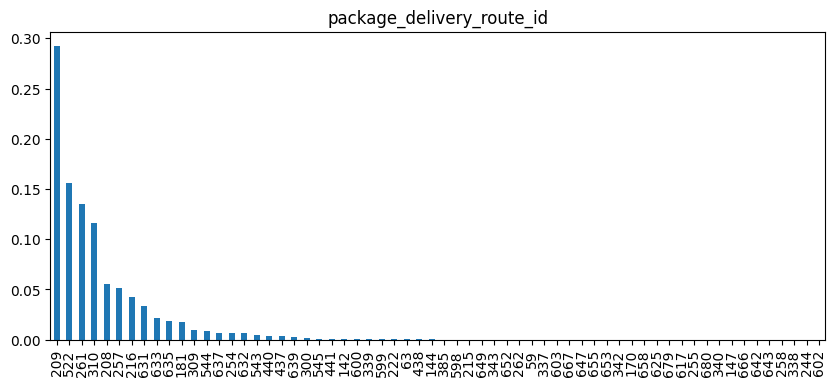

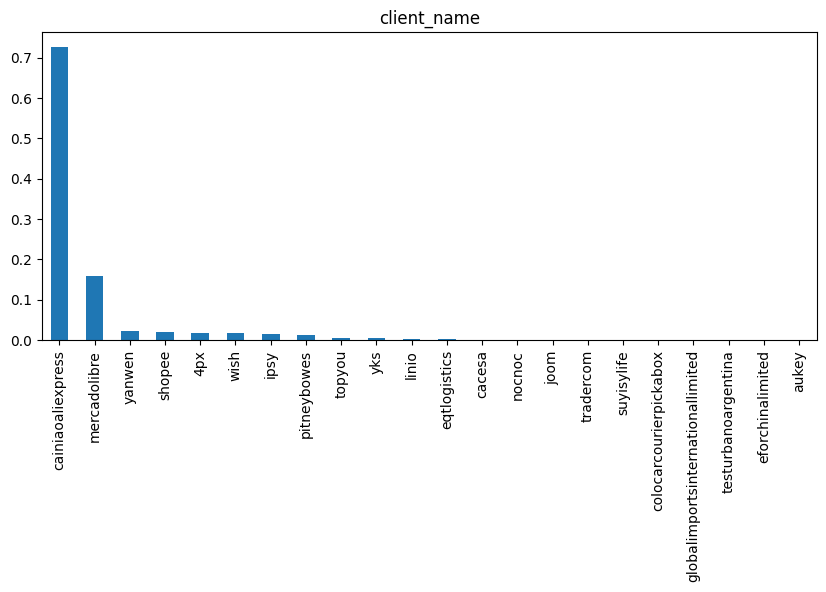

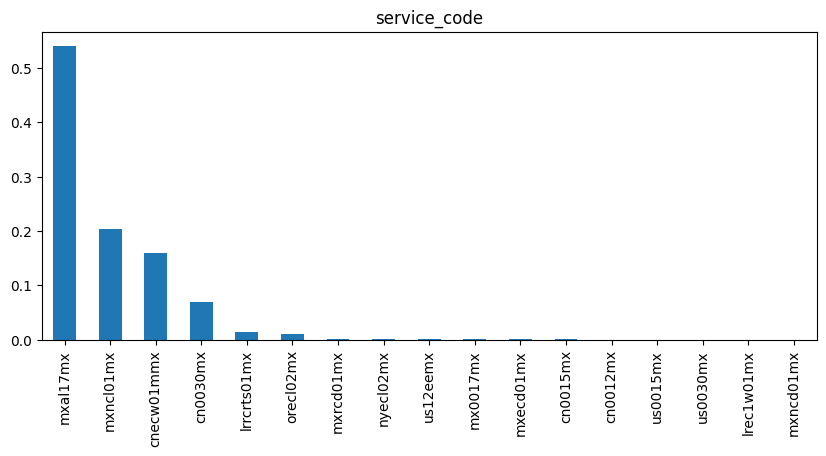

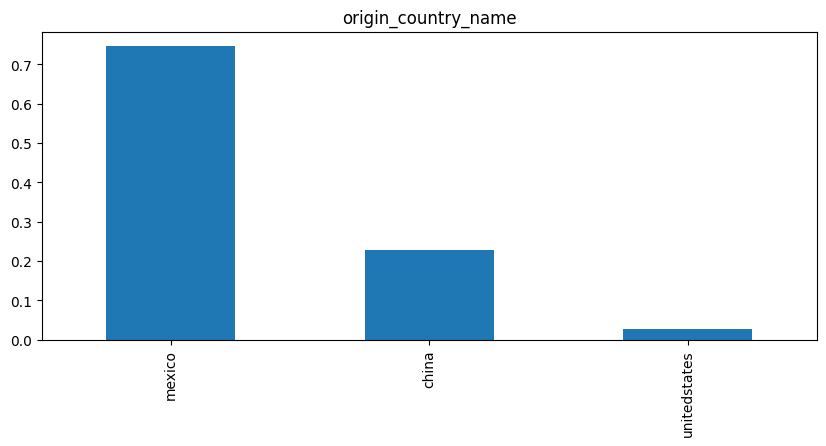

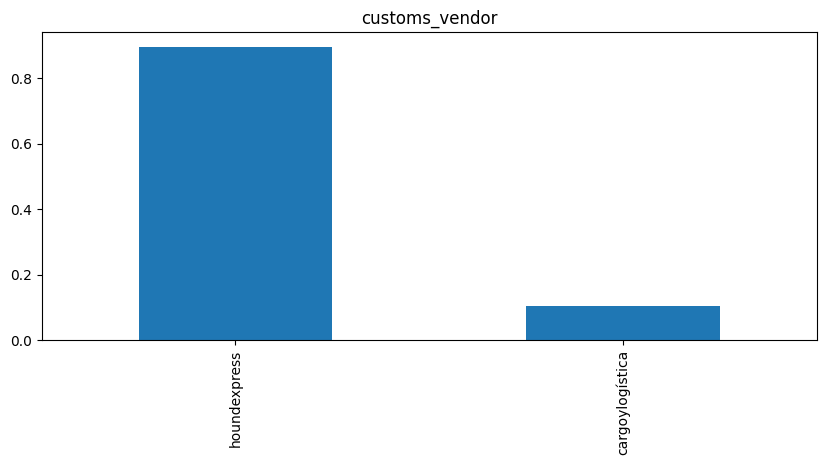

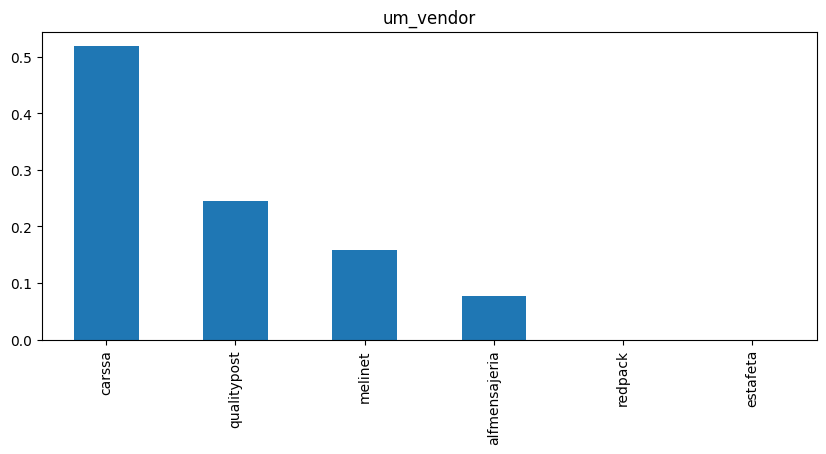

In [93]:
for col in df_cat.columns:
    plt.figure(figsize = (10,4))
    plt.title(col)
    (df_cat[col].value_counts()/df_cat.shape[0]).plot(kind ="bar")
    plt.show()

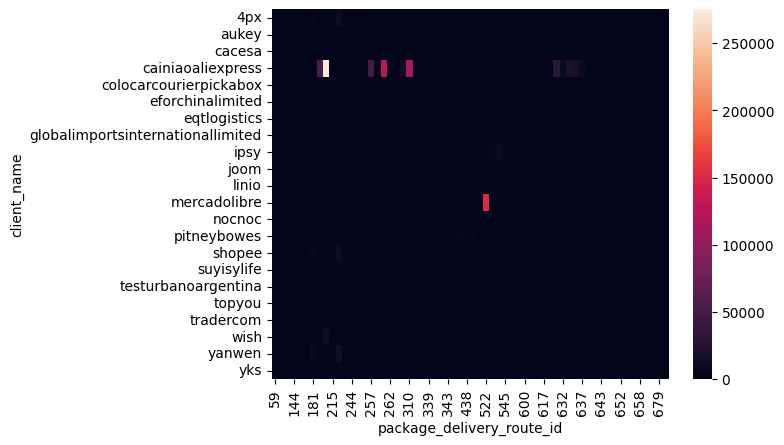

In [94]:
sns.heatmap(pd.crosstab(df_cat["client_name"],df_cat["package_delivery_route_id"]));

### Distribución de variables numéricas

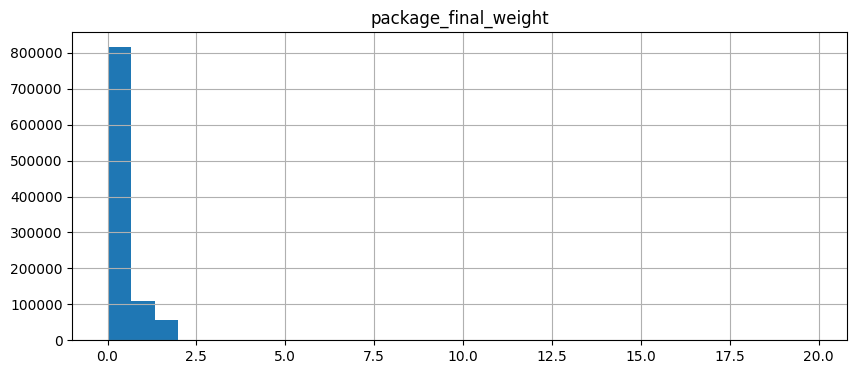

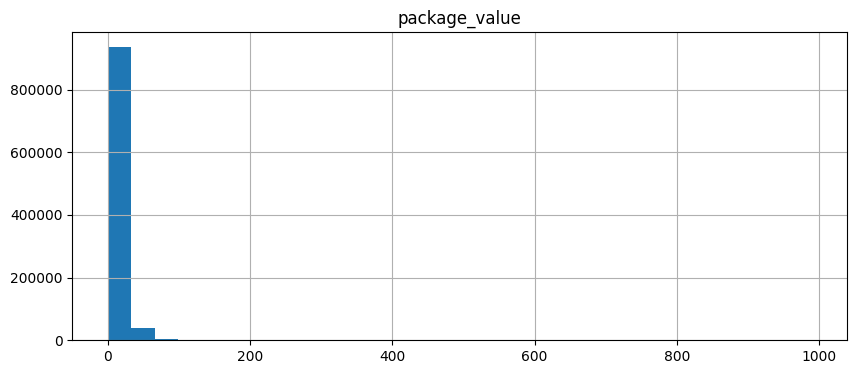

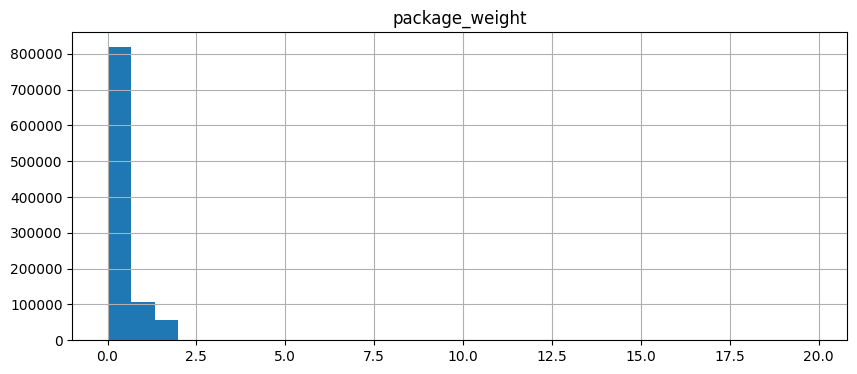

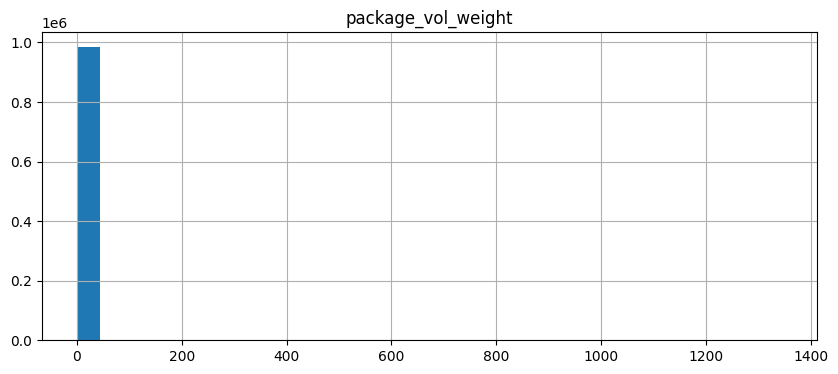

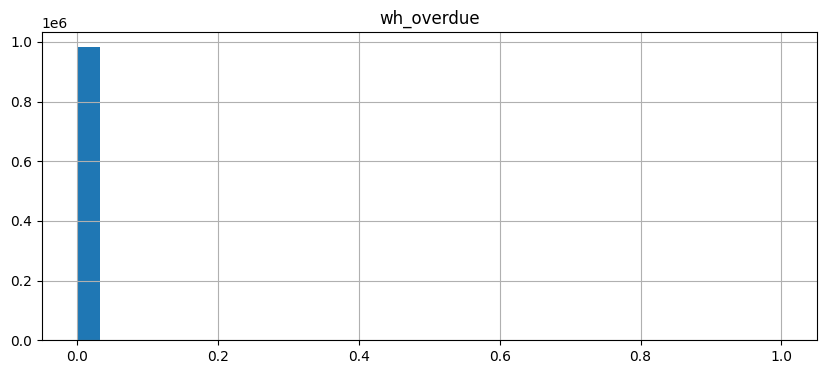

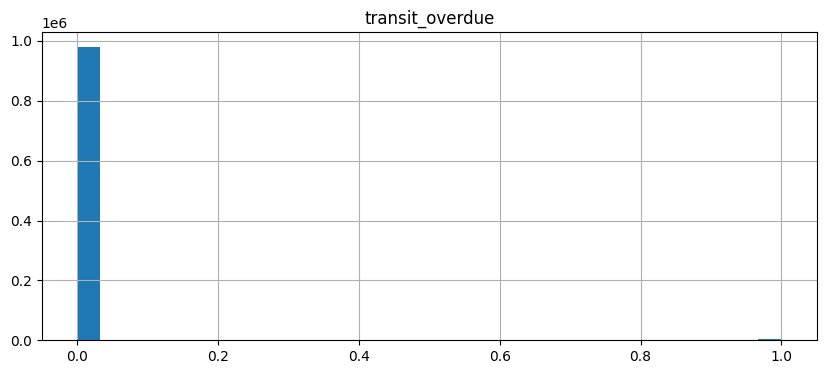

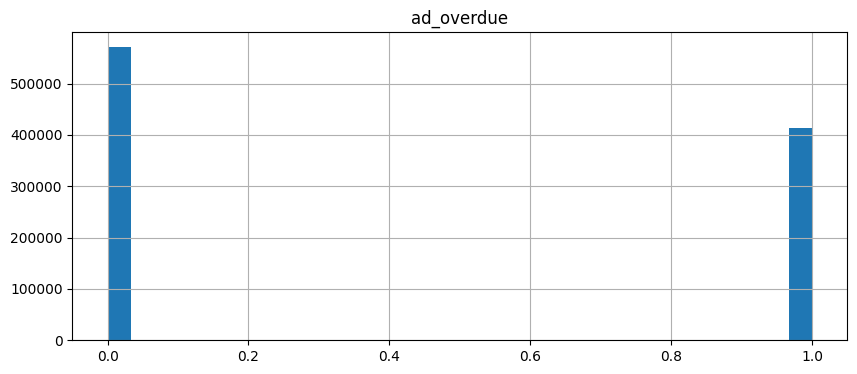

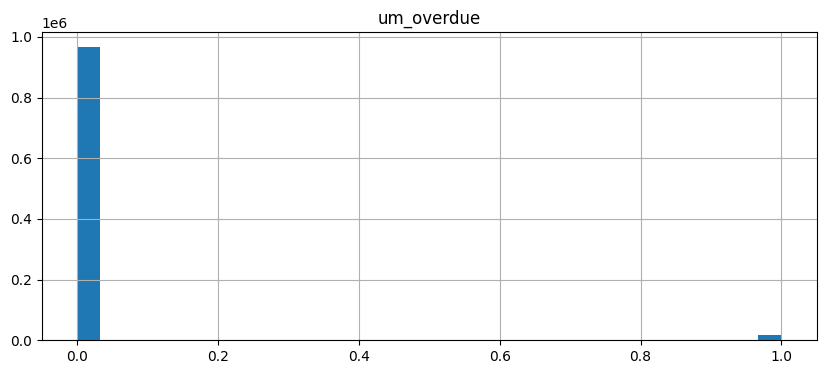

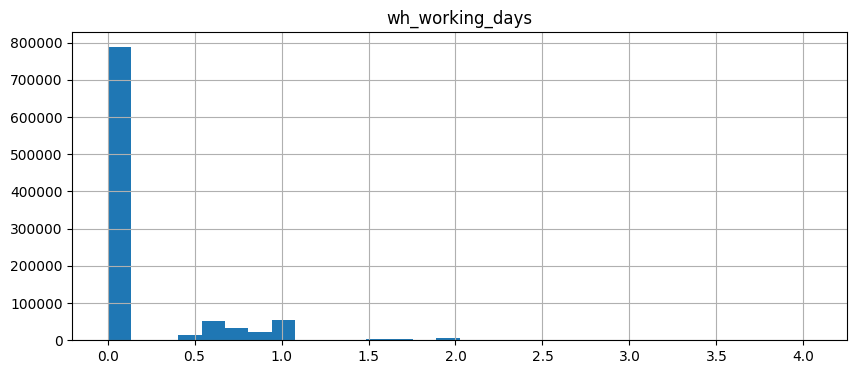

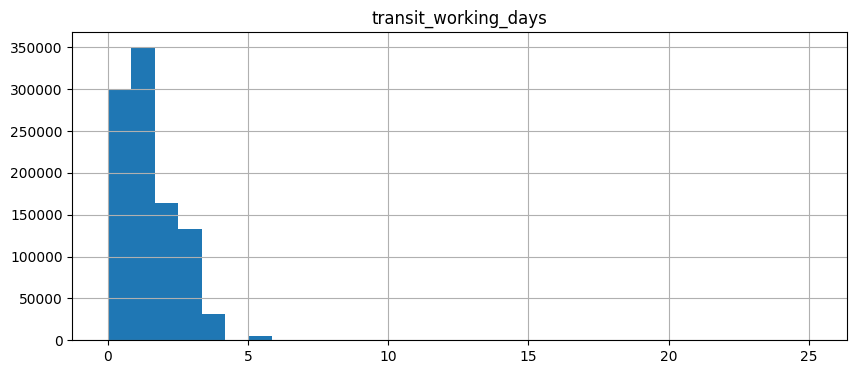

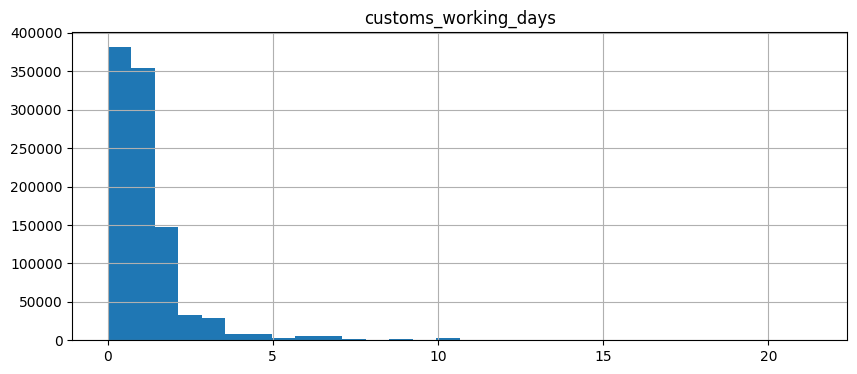

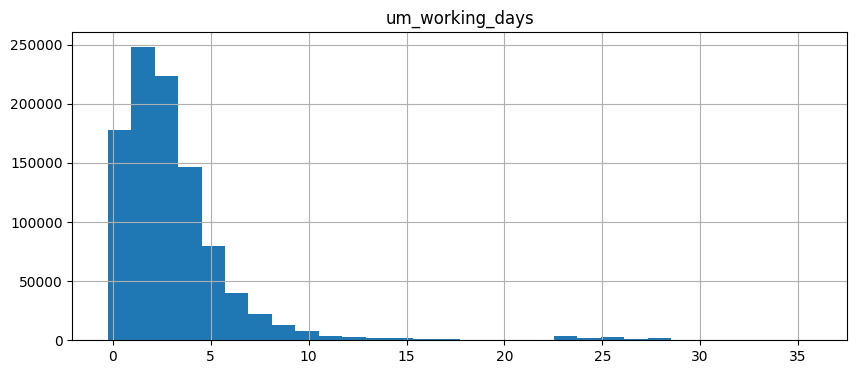

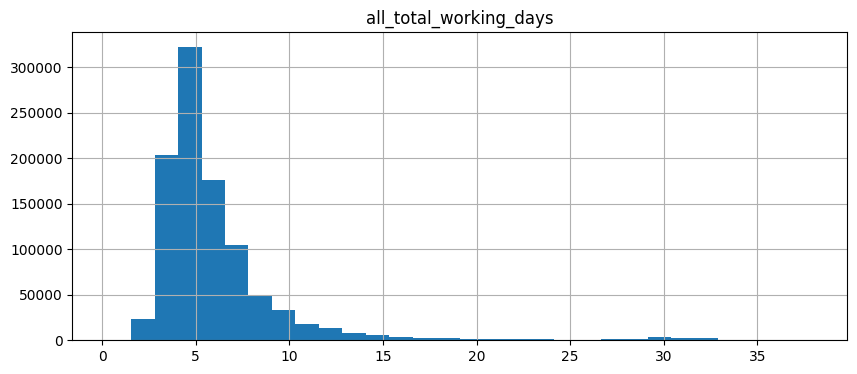

In [95]:
for col in df_num.columns:
    plt.figure(figsize = (10,4))
    plt.title(col)
    df_num[col].hist(bins=30)
    plt.show()

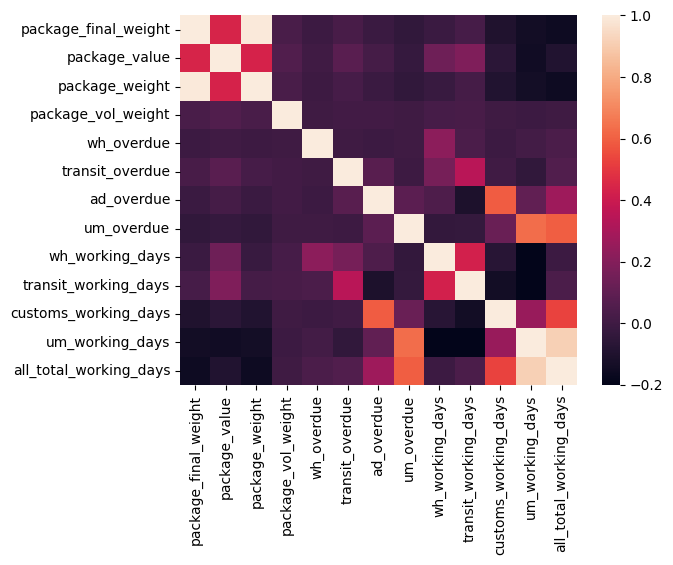

In [96]:
sns.heatmap(df_num.corr());

### Regresión por tramos

In [97]:
df_num.columns

Index(['package_final_weight', 'package_value', 'package_weight',
       'package_vol_weight', 'wh_overdue', 'transit_overdue', 'ad_overdue',
       'um_overdue', 'wh_working_days', 'transit_working_days',
       'customs_working_days', 'um_working_days', 'all_total_working_days'],
      dtype='object')

In [98]:
X = df_num[['wh_overdue', 'transit_overdue', 'ad_overdue',
       'um_overdue']]

y = df_num["all_total_working_days"]

In [99]:
X.head()

,wh_overdue,transit_overdue,ad_overdue,um_overdue
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,0


In [100]:
X = sm.add_constant(X, prepend=False)

In [101]:
X.head()

,wh_overdue,transit_overdue,ad_overdue,um_overdue,const
0,0,0,0,0,1.0
1,0,0,1,0,1.0
2,0,0,1,0,1.0
3,0,0,0,0,1.0
4,0,0,0,0,1.0


In [102]:
# Fit and summarize OLS model
In [5]: mod = sm.OLS(y, X)

In [6]: res = mod.fit()

In [7]: print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     all_total_working_days   R-squared:                       0.404
Model:                                OLS   Adj. R-squared:                  0.404
Method:                     Least Squares   F-statistic:                 1.667e+05
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                            23:30:17   Log-Likelihood:            -2.4665e+06
No. Observations:                  984716   AIC:                         4.933e+06
Df Residuals:                      984711   BIC:                         4.933e+06
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
wh

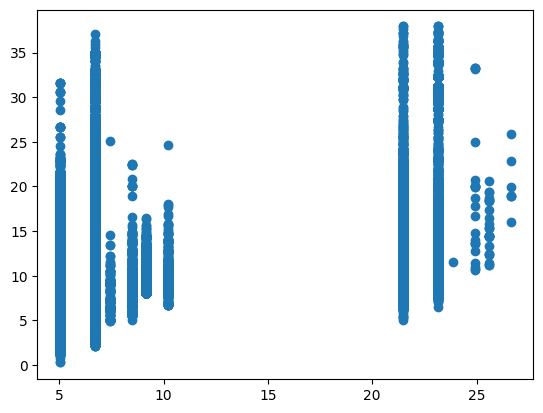

In [106]:
plt.scatter(res.predict(X), y)

In [61]:
df_num[['wh_overdue', 'transit_overdue', 'ad_overdue',
       'um_overdue']].mean()

wh_overdue         0.001843
transit_overdue    0.004958
ad_overdue         0.419720
um_overdue         0.018325
dtype: float64

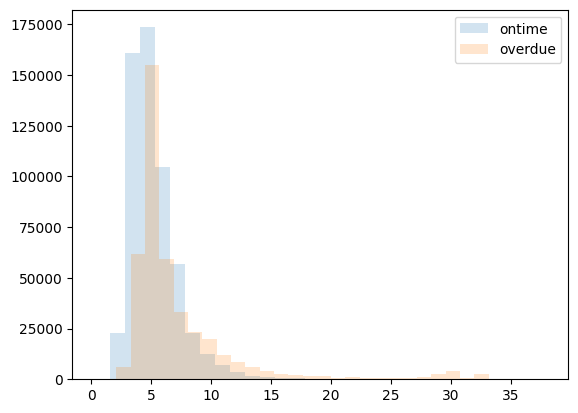

In [62]:
ontime = df_num[df_num["ad_overdue"]==0]["all_total_working_days"]
overdue = df_num[df_num["ad_overdue"]==1]["all_total_working_days"]
plt.hist(ontime, 30, alpha=0.2, label='ontime')
plt.hist(overdue, 30, alpha=0.2, label='overdue')
plt.legend(loc='upper right')
plt.show()

In [63]:
from matplotlib.ticker import PercentFormatter


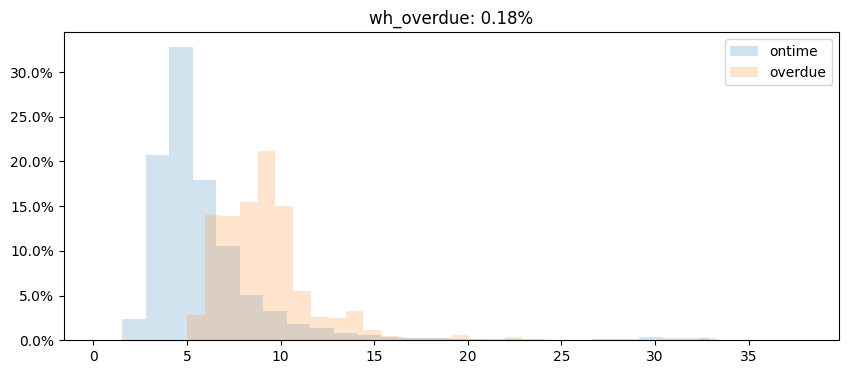

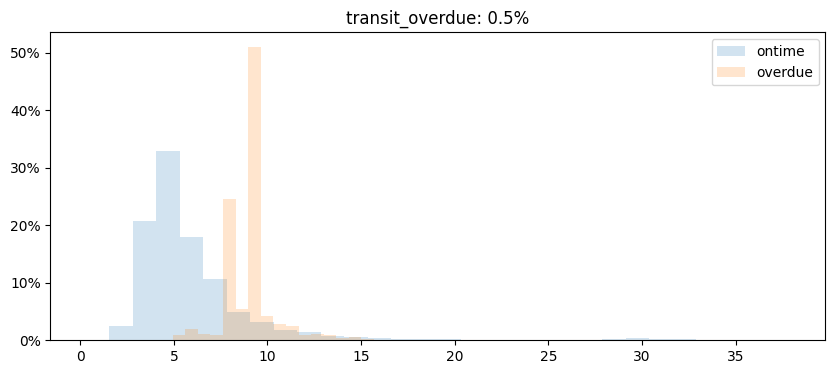

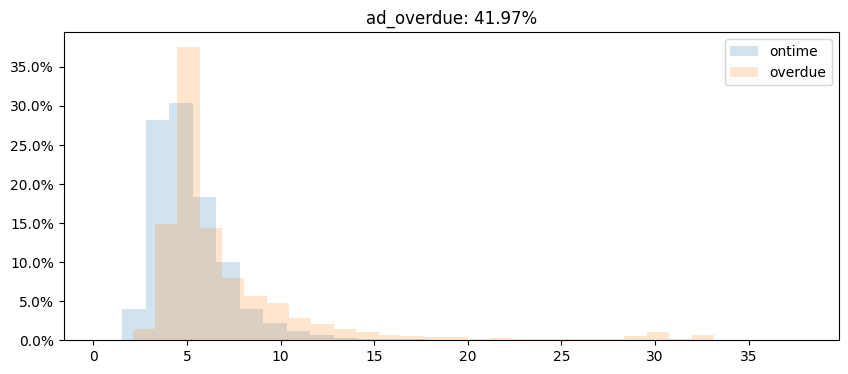

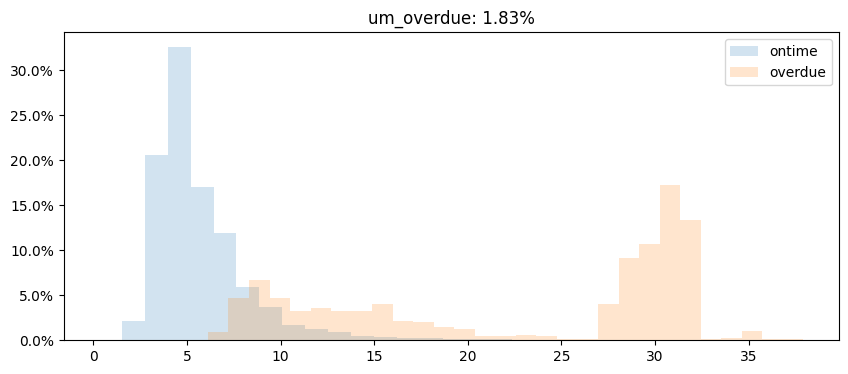

In [64]:
for var in ['wh_overdue', 'transit_overdue', 'ad_overdue',
       'um_overdue']:
    plt.figure(figsize = (10,4))
    temp = np.round(df_num[var].mean()*100,2)
    plt.title("{}: {}%".format(var, str(temp)))
    late = df_num[var]== 1
    ## *********** ontime ********
    ontime = df_num[~late]["all_total_working_days"]
    overdue = df_num[late]["all_total_working_days"]
    plt.hist(ontime, 30, alpha=0.2, label='ontime', weights=np.ones(ontime.shape[0]) / ontime.shape[0])
    
    plt.hist(overdue, 30, alpha=0.2, label='overdue', weights=np.ones(overdue.shape[0]) / overdue.shape[0])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
   
    plt.legend(loc='upper right')
    plt.show()

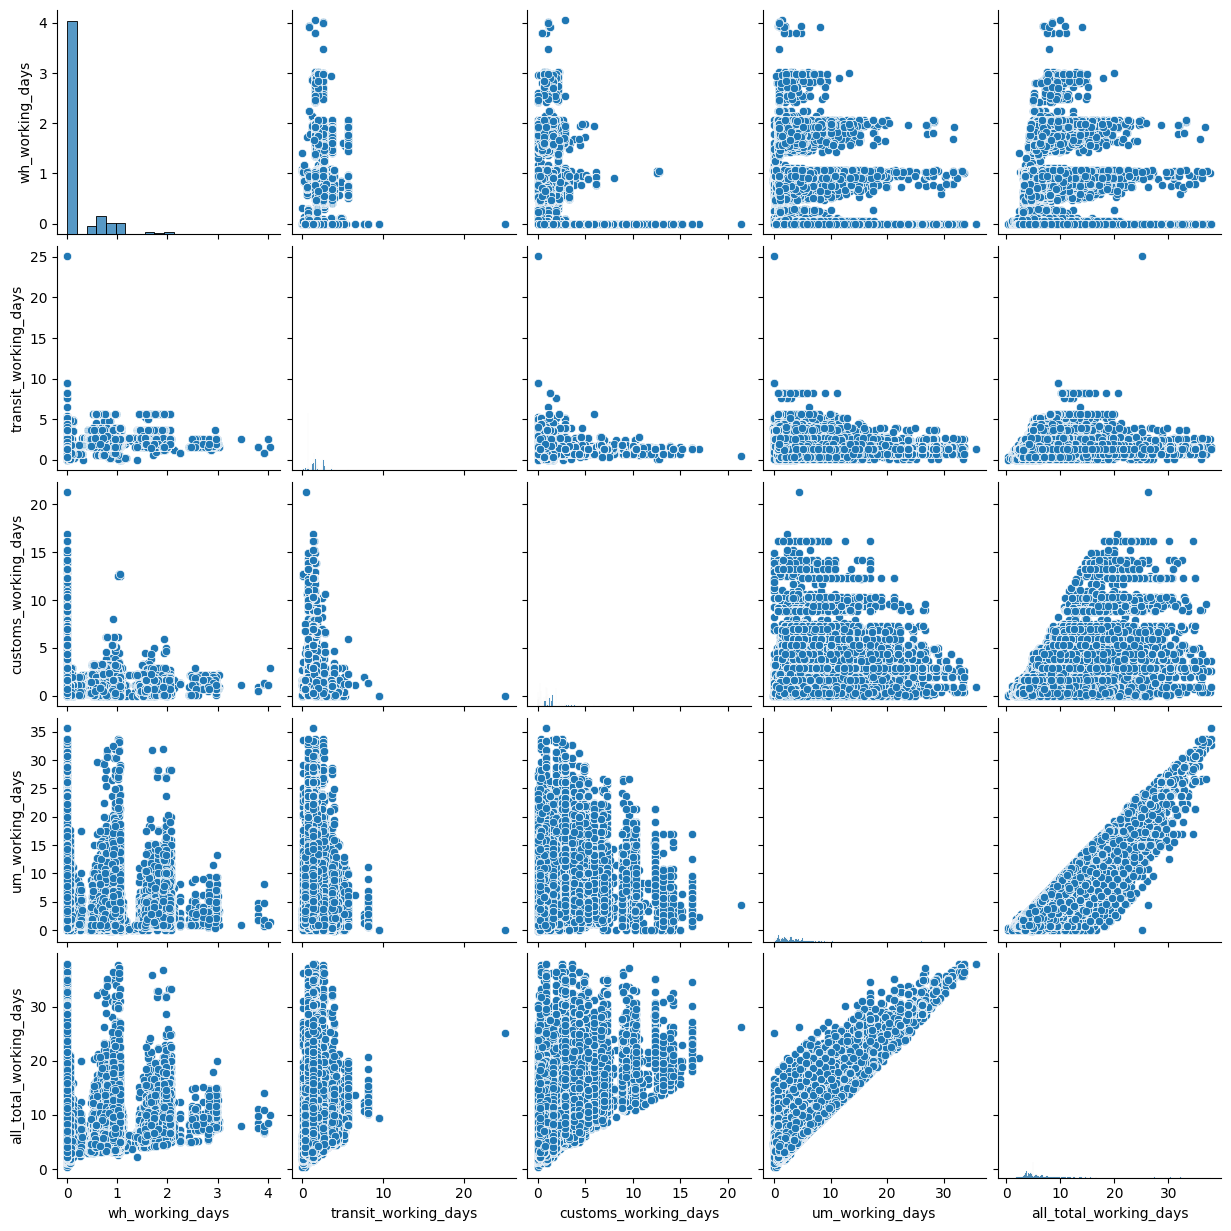

In [65]:
sns.pairplot(df_num[['wh_working_days', 'transit_working_days',
       'customs_working_days', 'um_working_days', 'all_total_working_days']]);

In [66]:
temp = df[['um_vendor','um_overdue']].groupby("um_vendor").size()

In [67]:
temp

um_vendor
ALF MENSAJERIA     76327
CARSSA            510652
Estafeta               9
MELINET           156091
Quality Post      241621
Redpack               16
dtype: int64

In [68]:
temp = df[['um_vendor','um_overdue']].groupby("um_vendor").mean()

In [69]:
temp

,um_overdue
um_vendor,
ALF MENSAJERIA,0.131814
CARSSA,0.011407
Estafeta,0.000000
MELINET,0.000019
Quality Post,0.008911
Redpack,0.187500


In [ ]:
temp = df[['um_vendor','um_overdue']].groupby("um_vendor").mean()

ax2.barh(temp.index, temp["um_overdue"])

In [74]:
temp = df[['um_vendor','um_overdue']].groupby("um_vendor").size().reset_index()
temp.columns = ["vendor", "overdue"]

KeyError: 'um_overdue'

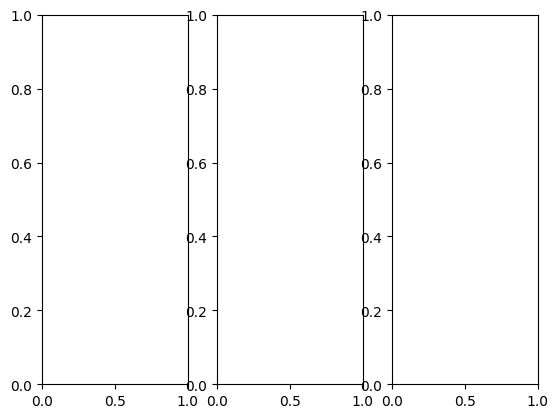

<Figure size 1500x400 with 0 Axes>

In [70]:
fig, (ax1, ax2, ax3) =  plt.subplots(1,3)
plt.figure(figsize =(15,4))
temp = df[['um_vendor','um_overdue']].groupby("um_vendor").size()

ax1.barh(temp.index, temp["um_overdue"])



plt.show()

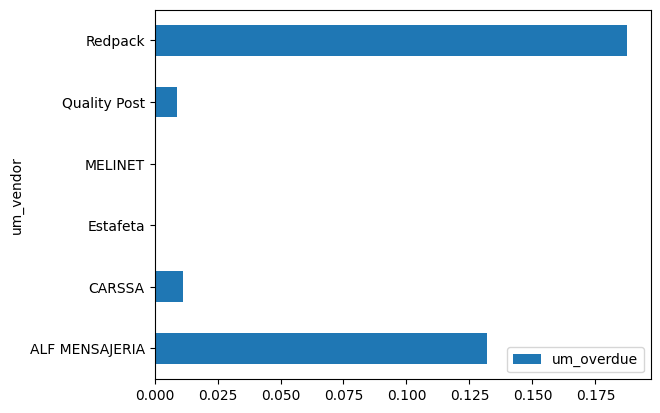

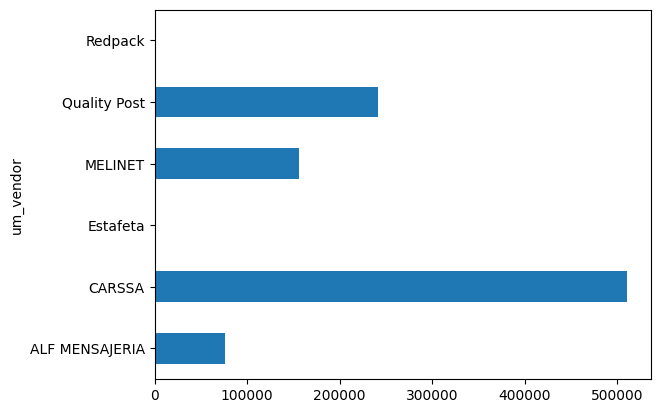